1) Escolha uma base de dados de classificação (ex.: wine, breast cancer, iris). O
Scikit-learn e o UCI Repository possuem algumas bases. Caso algum dado seja
categórico, transforme para númerico.
2) Divida os dados em treino/teste utilizando a técnica hold-out. Escolha uma
porcentagem para treino/teste (mais utilizadas: 90/10, 80/20, 75/25, 70/30, 50/50).
3) Realize a classificação utilizando o KNN, utilizando a biblioteca Scikit-Learn.
4) Calcule algumas métricas. Obrigatório: acurácia. Exemplo de outras métricas: recall,
precision, F1-Score. Utilize o Scikit-Learn (classification_report, accuracy_score,
f1_score, etc)
5) Plot a matriz de confusão.
6) Realize vários experimentos, modificando a quantidade de vizinhos (parametro
n_neighbors), e crie um plot (k vs acurácia).
7) Discuta os resultados encontrados.
8) Utilize a técnica k-fold e discuta os resultados, comparando com a técnica hold-out.

In [244]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


In [245]:
cols = ['sepal_length','sepal_width','petal_length','petal_width','class']
df = pd.read_csv("Dataset\iris (1).data", header=None, names=cols)

In [246]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [247]:
X = df.iloc[:,0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [248]:
Y = df.iloc[:,4]
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [249]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

In [250]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
2,4.7,3.2,1.3,0.2
24,4.8,3.4,1.9,0.2
121,5.6,2.8,4.9,2.0
57,4.9,2.4,3.3,1.0
139,6.9,3.1,5.4,2.1
...,...,...,...,...
109,7.2,3.6,6.1,2.5
98,5.1,2.5,3.0,1.1
123,6.3,2.7,4.9,1.8
94,5.6,2.7,4.2,1.3


In [251]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
40,5.0,3.5,1.3,0.3
106,4.9,2.5,4.5,1.7
145,6.7,3.0,5.2,2.3
112,6.8,3.0,5.5,2.1
132,6.4,2.8,5.6,2.2
10,5.4,3.7,1.5,0.2
1,4.9,3.0,1.4,0.2
111,6.4,2.7,5.3,1.9
108,6.7,2.5,5.8,1.8
75,6.6,3.0,4.4,1.4


In [252]:
Y_train

2          Iris-setosa
24         Iris-setosa
121     Iris-virginica
57     Iris-versicolor
139     Iris-virginica
            ...       
109     Iris-virginica
98     Iris-versicolor
123     Iris-virginica
94     Iris-versicolor
133     Iris-virginica
Name: class, Length: 112, dtype: object

In [253]:
Y_test

40         Iris-setosa
106     Iris-virginica
145     Iris-virginica
112     Iris-virginica
132     Iris-virginica
10         Iris-setosa
1          Iris-setosa
111     Iris-virginica
108     Iris-virginica
75     Iris-versicolor
27         Iris-setosa
134     Iris-virginica
21         Iris-setosa
126     Iris-virginica
61     Iris-versicolor
50     Iris-versicolor
18         Iris-setosa
58     Iris-versicolor
129     Iris-virginica
136     Iris-virginica
78     Iris-versicolor
3          Iris-setosa
70     Iris-versicolor
11         Iris-setosa
74     Iris-versicolor
117     Iris-virginica
34         Iris-setosa
120     Iris-virginica
97     Iris-versicolor
54     Iris-versicolor
102     Iris-virginica
60     Iris-versicolor
148     Iris-virginica
46         Iris-setosa
42         Iris-setosa
5          Iris-setosa
142     Iris-virginica
92     Iris-versicolor
Name: class, dtype: object

In [254]:
neigh = KNeighborsClassifier(n_neighbors=3)

Sempre transformar entradas categoricas em numericas

In [255]:
labelencoder = LabelEncoder()

Y_train = labelencoder.fit_transform(Y_train)


In [256]:
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [257]:
Y_test = labelencoder.fit_transform(Y_test)
Y_test

array([0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 1])

In [258]:
Y_predict = neigh.predict(X_test)
Y_predict

C:\Users\fcopr\.conda\envs\ai\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0,
       2, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 1])

In [259]:
Y_test

array([0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 1])

In [260]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      0.91      0.91        11
           2       0.93      0.93      0.93        15

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [261]:
cm = confusion_matrix(Y_test,Y_predict)

In [262]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

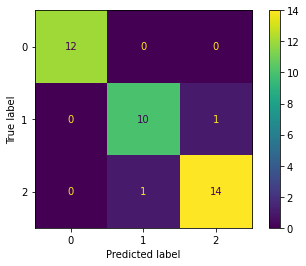

In [265]:
disp.plot()

In [266]:
plt.show()